### Data Preprocessing <a class="anchor" id="goal"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
#from collections import Counter
#plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option('display.float_format', '{:.2f}'.format)

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

### Loading and checking  dataset <a class="anchor" id="dataset"></a>

In [2]:
df=pd.read_csv("raw_house_data.csv")

In [3]:
df.info()   
#We have chance to see the types of the features and number of not-Null values with this code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory 

In [4]:
df.shape

(5000, 16)

In [5]:
df2=df['kitchen_features'].str.split(',', expand=True).rename(columns = lambda x: "kitchen_f"+str(x+1));
df3=df['floor_covering'].str.split(',', expand=True).rename(columns = lambda x: "floor_c"+str(x+1))

In [6]:
df=df.drop(['floor_covering'], axis=1)

In [7]:
df["House_Age"]=2023-df.year_built;
df=df.drop(['year_built'], axis=1)

In [8]:
df.head(1)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,HOA,House_Age
0,21530491,5300000.00,85637,-110.38,31.36,2154.00,5272.00,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,0,82


In [9]:
df=df.drop(['kitchen_features'], axis=1)

In [10]:
df.head(1)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,House_Age
0,21530491,5300000.00,85637,-110.38,31.36,2154.00,5272.00,13,10,10500,0,6,0,82


In [11]:
df2.sample(10)
#to see data from different rows, just for kitchen properties

,kitchen_f1,kitchen_f2,kitchen_f3,kitchen_f4,kitchen_f5,kitchen_f6,kitchen_f7,kitchen_f8,kitchen_f9,kitchen_f10,kitchen_f11,kitchen_f12,kitchen_f13,kitchen_f14,kitchen_f15
3117,Dishwasher,Double Sink,Garbage Disposal,Gas Range,Island,Pantry: Walk-In,Prep Sink,Refrigerator,Reverse Osmosis,Appliance Color: Almond,Countertops: Granite/Butcher,Microwave: Built-In,Oven: Built-In,None,None
3775,Dishwasher,Garbage Disposal,Refrigerator,Microwave,Oven,None,None,None,None,None,None,None,None,None,None
3746,Dishwasher,Gas Range,Refrigerator,Microwave: .,Oven: .,None,None,None,None,None,None,None,None,None,None
4327,Compactor,Dishwasher,Garbage Disposal,Oven,None,None,None,None,None,None,None,None,None,None,None
2293,Dishwasher,Garbage Disposal,Gas Range,Island,Pantry: Closet,Refrigerator,Appliance Color: Stainless,Countertops: Quartz,Microwave: Wolf,Oven: 3 Wolf,None,None,None,None,None
1979,Compactor,Dishwasher,Garbage Disposal,Microwave,Oven,None,None,None,None,None,None,None,None,None,None
4425,Dishwasher,Garbage Disposal,Refrigerator,Microwave,Oven,None,None,None,None,None,None,None,None,None,None
2380,Garbage Disposal,Refrigerator,Microwave,None,None,None,None,None,None,None,None,None,None,None,None
4789,Dishwasher,Garbage Disposal,Microwave,Oven,None,None,None,None,None,None,None,None,None,None,None
345,Dishwasher,Garbage Disposal,Refrigerator,Microwave,Oven,None,None,None,None,None,None,None,None,None,None


In [12]:
df.info()   
#We have chance to see the types of the features and number of not-Null values with this code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MLS         5000 non-null   int64  
 1   sold_price  5000 non-null   float64
 2   zipcode     5000 non-null   int64  
 3   longitude   5000 non-null   float64
 4   latitude    5000 non-null   float64
 5   lot_acres   4990 non-null   float64
 6   taxes       5000 non-null   float64
 7   bedrooms    5000 non-null   int64  
 8   bathrooms   5000 non-null   object 
 9   sqrt_ft     5000 non-null   object 
 10  garage      5000 non-null   object 
 11  fireplaces  5000 non-null   object 
 12  HOA         5000 non-null   object 
 13  House_Age   5000 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 547.0+ KB


In [13]:
df['bathrooms'] = pd.to_numeric(df['bathrooms'],errors = 'coerce');
df['sqrt_ft'] = pd.to_numeric(df['sqrt_ft'],errors = 'coerce');
df['garage'] = pd.to_numeric(df['garage'],errors = 'coerce');
df['fireplaces'] = pd.to_numeric(df['fireplaces'],errors = 'coerce')
df['HOA'] = pd.to_numeric(df['HOA'],errors = 'coerce')
#correlation can not be calculated for object data types,therefore,converted to numeric.

In [14]:
df2.fillna(0)
#to fill the null values with zero

,kitchen_f1,kitchen_f2,kitchen_f3,kitchen_f4,kitchen_f5,kitchen_f6,kitchen_f7,kitchen_f8,kitchen_f9,kitchen_f10,kitchen_f11,kitchen_f12,kitchen_f13,kitchen_f14,kitchen_f15
0,Dishwasher,Freezer,Refrigerator,Oven,0,0,0,0,0,0,0,0,0,0,0
1,Dishwasher,Garbage Disposal,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Dishwasher,Garbage Disposal,Refrigerator,0,0,0,0,0,0,0,0,0,0,0,0
3,Dishwasher,Double Sink,Pantry: Butler,Refrigerator,0,0,0,0,0,0,0,0,0,0,0
4,Dishwasher,Garbage Disposal,Refrigerator,Microwave,Oven,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Dishwasher,Double Sink,Garbage Disposal,Gas Range,Island,Lazy Susan,Pantry: Closet,Appliance Color: Stainless,Countertops: Granite,0,0,0,0,0,0
4996,Dishwasher,Double Sink,Electric Range,Garbage Disposal,Lazy Susan,Pantry: Closet,Refrigerator,Wet Bar,Appliance Color: Stainless,Microwave: Built-in,0,0,0,0,0
4997,Dishwasher,Electric Range,Island,Refrigerator,Reverse Osmosis,Appliance Color: Stainless,0,0,0,0,0,0,0,0,0
4998,Dishwasher,Double Sink,Garbage Disposal,Gas Range,Pantry: Cabinet,Appliance Color: Stainless,Countertops: Granite slab,Microwave: Stainless over oven,Oven: wall,0,0,0,0,0,0


In [15]:
df2=df2.replace(regex={r'\D+': 1});    #instead of string values, to write 1
df2=df2.fillna(0)   #to fill the null values with zero

In [16]:
df2.head()
# first 5 rows

,kitchen_f1,kitchen_f2,kitchen_f3,kitchen_f4,kitchen_f5,kitchen_f6,kitchen_f7,kitchen_f8,kitchen_f9,kitchen_f10,kitchen_f11,kitchen_f12,kitchen_f13,kitchen_f14,kitchen_f15
0,1,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [17]:
df2['Kitchen_Sum']=df2.sum(axis=1);
#cretaed a new column named Kitchen_Sum and sum of the values from that row were written to that column

In [18]:
df2.head()

,kitchen_f1,kitchen_f2,kitchen_f3,kitchen_f4,kitchen_f5,kitchen_f6,kitchen_f7,kitchen_f8,kitchen_f9,kitchen_f10,kitchen_f11,kitchen_f12,kitchen_f13,kitchen_f14,kitchen_f15,Kitchen_Sum
0,1,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00
1,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
2,1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
3,1,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00
4,1,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00


In [19]:
df2=df2['Kitchen_Sum']   #defined df2 just with Kitchen_Sum column

In [20]:
df2

0       4.00
1       2.00
2       3.00
3       4.00
4       5.00
        ... 
4995    9.00
4996   10.00
4997    6.00
4998    9.00
4999    5.00
Name: Kitchen_Sum, Length: 5000, dtype: float64

In [21]:
df3=df3.fillna(0)    #null values replaced with zeros

In [22]:
df3=df3.replace(regex={r'\D+': 1});  ##instead of string values, to write 1
df3=df3.fillna(0)  #null values replaced with zeros

In [23]:
df3['Floor_Sum']=df3.sum(axis=1)    
#cretaed a new column named Floor_Sum and sum of the values from that row were written to that column

In [24]:
df3=df3['Floor_Sum']   #defined df3 just with Floor_Sum column

In [25]:
df3

0       2
1       2
2       2
3       3
4       2
       ..
4995    2
4996    2
4997    1
4998    2
4999    2
Name: Floor_Sum, Length: 5000, dtype: int64

In [26]:
df_new= pd.concat([df2,df3], axis=1)  #df2 and df2 were concatenated

In [27]:
df_new=df_new.astype(int)

In [28]:
df_new.sample(10)   #from different 10 rows to see the data frame

,Kitchen_Sum,Floor_Sum
2886,5,2
4763,10,1
556,6,3
4687,5,1
761,7,2
1570,5,3
3053,3,2
1338,9,2
4191,5,2
2717,12,1


In [29]:
df_neww= pd.concat([df,df_new], axis=1)  #df and df_new were concatenated
df=df_neww

In [30]:
# df.sort_values('sold_price',ascending=False, inplace = True);      
# df.reset_index(drop = True, inplace = True) 

#second one, to order the index values
#if data set are given  seperately, this code is very nice to sort the values                                                                  #kendimiz ayarliyorsak riskli bir kod. 

In [31]:
df.head(5)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,House_Age,Kitchen_Sum,Floor_Sum
0,21530491,5300000.00,85637,-110.38,31.36,2154.00,5272.00,13,10.00,10500.00,0.00,6.00,0.00,82,4,2
1,21529082,4200000.00,85646,-111.05,31.59,1707.00,10422.36,2,2.00,7300.00,0.00,5.00,0.00,26,2,2
2,3054672,4200000.00,85646,-111.04,31.59,1707.00,10482.00,2,3.00,NaN,NaN,5.00,NaN,26,3,2
3,21919321,4500000.00,85646,-111.04,31.65,636.67,8418.58,7,5.00,9019.00,4.00,4.00,NaN,93,4,3
4,21306357,3411450.00,85750,-110.81,32.29,3.21,15393.00,4,6.00,6396.00,3.00,5.00,55.00,28,5,2


In [32]:
#df['MLS'].nunique()   

#to check how many unique values in MLS column

In [33]:
#df.set_index('MLS',inplace=True)

#if it is needed,to set the MLS column as an index column.Because for each house there is a different number.

In [34]:
df.info()   
#to see the types of the features and number of not-Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MLS          5000 non-null   int64  
 1   sold_price   5000 non-null   float64
 2   zipcode      5000 non-null   int64  
 3   longitude    5000 non-null   float64
 4   latitude     5000 non-null   float64
 5   lot_acres    4990 non-null   float64
 6   taxes        5000 non-null   float64
 7   bedrooms     5000 non-null   int64  
 8   bathrooms    4994 non-null   float64
 9   sqrt_ft      4944 non-null   float64
 10  garage       4993 non-null   float64
 11  fireplaces   4975 non-null   float64
 12  HOA          4420 non-null   float64
 13  House_Age    5000 non-null   int64  
 14  Kitchen_Sum  5000 non-null   int32  
 15  Floor_Sum    5000 non-null   int32  
dtypes: float64(10), int32(2), int64(4)
memory usage: 586.1 KB


In [35]:
df.isnull().sum()
#number of Null values for each feature

MLS              0
sold_price       0
zipcode          0
longitude        0
latitude         0
lot_acres       10
taxes            0
bedrooms         0
bathrooms        6
sqrt_ft         56
garage           7
fireplaces      25
HOA            580
House_Age        0
Kitchen_Sum      0
Floor_Sum        0
dtype: int64

In [36]:
df['lot_acres'].replace(0, df['lot_acres'].mean(), inplace=True)
#replacing 0 values with mean

In [37]:
df = df.fillna(np.nan)   #to replace with NaN

In [38]:
df.HOA.fillna(0,inplace=True)
#null values with 0

In [39]:
df["HOA"] = [0 if i==0 else 1 for i in df["HOA"]]
#replacing HOA values with 0 and 1

In [40]:
df["HOA"].value_counts()

1    3596
0    1404
Name: HOA, dtype: int64

In [41]:
df.garage   #to see only garage column

0      0.00
1      0.00
2       NaN
3      4.00
4      3.00
       ... 
4995   3.00
4996   3.00
4997   0.00
4998   3.00
4999    NaN
Name: garage, Length: 5000, dtype: float64

In [42]:
df.isnull().sum()
#sum of NaN values

MLS             0
sold_price      0
zipcode         0
longitude       0
latitude        0
lot_acres      10
taxes           0
bedrooms        0
bathrooms       6
sqrt_ft        56
garage          7
fireplaces     25
HOA             0
House_Age       0
Kitchen_Sum     0
Floor_Sum       0
dtype: int64

In [43]:
df.head(2)  #first 2 rows

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,House_Age,Kitchen_Sum,Floor_Sum
0,21530491,5300000.00,85637,-110.38,31.36,2154.00,5272.00,13,10.00,10500.00,0.00,6.00,0,82,4,2
1,21529082,4200000.00,85646,-111.05,31.59,1707.00,10422.36,2,2.00,7300.00,0.00,5.00,0,26,2,2


In [44]:
df['bathrooms'].replace('None', np.nan, inplace=True);
df['garage'].replace('None', np.nan, inplace=True);
df['sqrt_ft'].replace('None', np.nan, inplace=True);
df['lot_acres'].replace('None', np.nan, inplace=True)
#replacing with NaN values

In [45]:
df.dropna(subset= ["lot_acres","garage","bathrooms","sqrt_ft","fireplaces"],inplace=True,axis=0);
#to drop rows that are with None values from specific columns

In [46]:
df.sqrt_ft.value_counts()   #to see the number of each value from  sqrt_ft column

3541.00    50
3052.00    25
3420.00    18
3002.00    16
3811.00    16
           ..
5586.00     1
5117.00     1
3793.00     1
5285.00     1
1772.00     1
Name: sqrt_ft, Length: 2360, dtype: int64

In [47]:
df['garage'].replace("2.5", 2, inplace=True);
df['garage'].replace("3.5", 3, inplace=True);
df['garage'].replace("4.5", 4, inplace=True)
#to replace with a different vlaue instead of some specific values

In [48]:
df = df[df.House_Age != 0]   #taking the houses without the age value zero and creating a new data frame

In [49]:
df.House_Age.value_counts()  #to see the number of each value from  House_Age column

17     243
21     234
18     230
16     224
19     200
      ... 
110      1
100      1
116      1
112      1
96       1
Name: House_Age, Length: 112, dtype: int64

In [50]:
df.columns  #to see the columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'fireplaces', 'HOA', 'House_Age', 'Kitchen_Sum', 'Floor_Sum'], dtype='object')

In [51]:
#df.House_Age.value_counts().sort_index(ascending=True).head(25)  
#if it is needed,counting the number of houses that have the same age, ordering them and taking first 25 houses

In [52]:
df['bathrooms'].replace("2.5", 2, inplace=True);
df['bathrooms'].replace("3.5", 3, inplace=True);
df['bathrooms'].replace("4.5", 4, inplace=True)
#to replace with a different vlaue instead of some specific values

In [53]:
df.bathrooms.value_counts().head(25)  
#counting the number of bathrooms that have the number, ordering them and taking first 25 houses

3.00     1968
4.00     1821
5.00      651
6.00      206
2.00      188
7.00       56
8.00       19
9.00        8
3.50        7
2.50        3
1.00        3
11.00       2
35.00       2
10.00       1
4.50        1
14.00       1
18.00       1
15.00       1
36.00       1
Name: bathrooms, dtype: int64

In [54]:
df['Rooms']=df[["bathrooms","bedrooms"]].sum(axis=1);
#creating a new column and writing sum of 2 other columns

In [55]:
df["Rooms"]

0      23.00
1       4.00
3      12.00
4      10.00
5       7.00
        ... 
4994    5.00
4995    8.00
4996    7.00
4997    5.00
4998    8.00
Name: Rooms, Length: 4940, dtype: float64

In [56]:
df=df.drop(['bathrooms',"bedrooms","MLS"], axis=1);
#droping these columns

In [57]:
df.columns

Index(['sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes', 'sqrt_ft', 'garage', 'fireplaces', 'HOA', 'House_Age', 'Kitchen_Sum', 'Floor_Sum', 'Rooms'], dtype='object')

### Generating descriptive statistics and finding the correlation <a class="anchor" id="descor"></a>

In [58]:
df.describe().loc["mean":,]
#it gives us descriptive statistics values
#"count" value will be same for all of them.That's why I started from "mean" with "loc"

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,sqrt_ft,garage,fireplaces,HOA,House_Age,Kitchen_Sum,Floor_Sum,Rooms
mean,775748.54,85724.21,-110.91,32.32,4.27,9448.51,3715.98,2.82,1.88,0.72,30.72,6.49,2.17,7.76
std,316051.70,36.71,0.12,0.17,45.85,173984.78,1120.04,1.20,1.13,0.45,65.85,3.01,0.76,2.25
min,169000.00,85118.00,-112.52,31.36,0.02,0.00,1100.00,0.00,0.00,0.00,4.00,1.00,1.00,2.00
25%,585000.00,85718.00,-110.98,32.28,0.59,4819.76,3047.00,2.00,1.00,0.00,17.00,5.00,2.00,7.00
50%,679000.00,85737.00,-110.92,32.32,1.00,6250.80,3512.00,3.00,2.00,1.00,24.00,5.00,2.00,7.00
75%,840000.00,85750.00,-110.86,32.40,1.81,8106.15,4128.50,3.00,3.00,1.00,36.00,9.00,3.00,9.00
max,5300000.00,86323.00,-109.45,34.93,2154.00,12215075.00,22408.00,30.00,9.00,1.00,2023.00,15.00,6.00,71.00


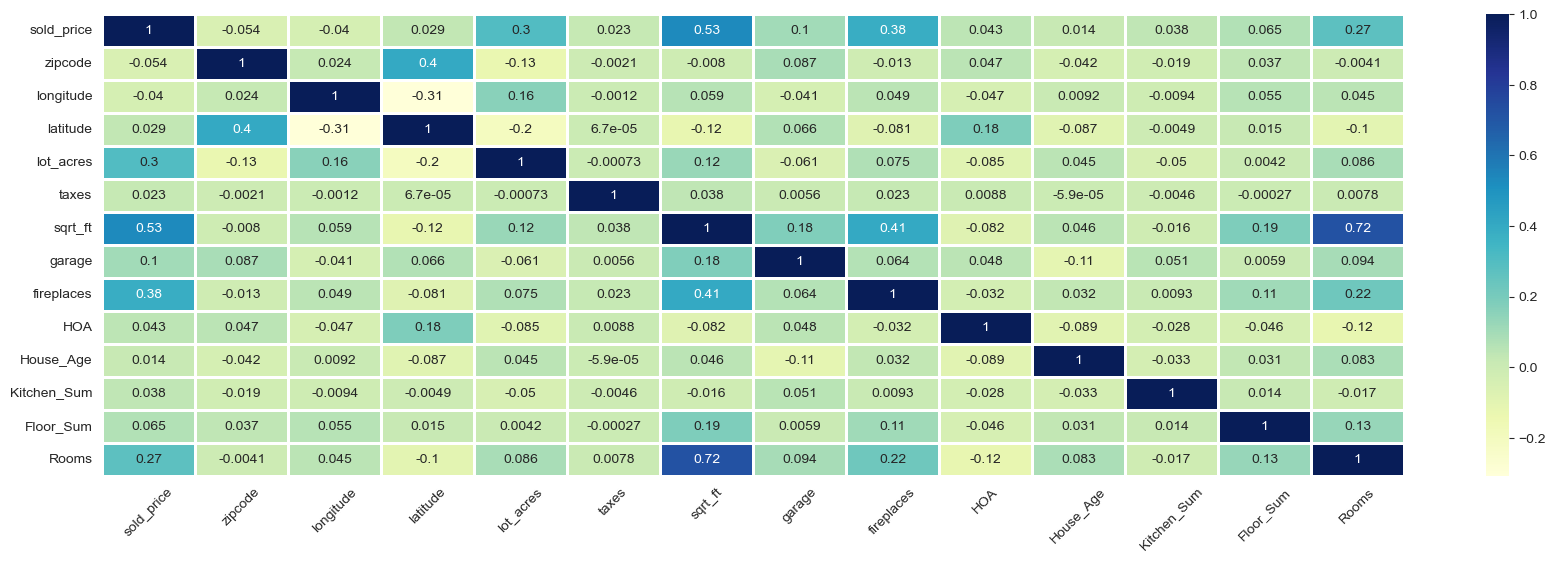

In [59]:
fig=plt.figure(figsize=(21,6))
sns.set_style('darkgrid',rc={'axes.facecolor': '#eaf'})
sns.set_palette('viridis',12)
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",linewidths=1)  
plt.xticks(rotation= 45) 
plt.show()

#correlation with heatmap

In [60]:
df.dtypes   #to see data types

sold_price     float64
zipcode          int64
longitude      float64
latitude       float64
lot_acres      float64
taxes          float64
sqrt_ft        float64
garage         float64
fireplaces     float64
HOA              int64
House_Age        int64
Kitchen_Sum      int32
Floor_Sum        int32
Rooms          float64
dtype: object

In [61]:
corr = df.corr().sold_price
corr[np.argsort(corr, axis= 0)[:-1]]    
#correlation between sold_price and other features, ordering them from min to max
#"argsort returns the indices that would sort an array
#so, we can easily see which features are more effective and which ones are not 

zipcode       -0.05
longitude     -0.04
House_Age      0.01
taxes          0.02
latitude       0.03
Kitchen_Sum    0.04
HOA            0.04
Floor_Sum      0.06
garage         0.10
Rooms          0.27
lot_acres      0.30
fireplaces     0.38
sqrt_ft        0.53
Name: sold_price, dtype: float64

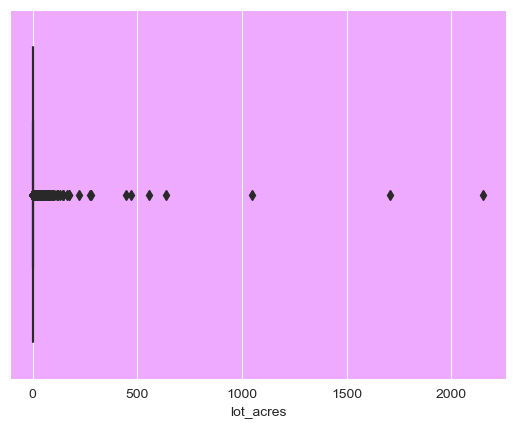

In [62]:
sns.boxplot(x=df["lot_acres"])
plt.show()

#to see the outliers with boxplot for lot_acres feature

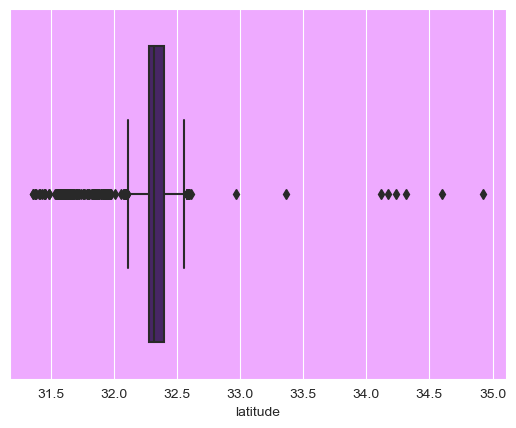

In [63]:
sns.boxplot(x=df["latitude"])
plt.show()

#to see the outliers with boxplot for latitude feature

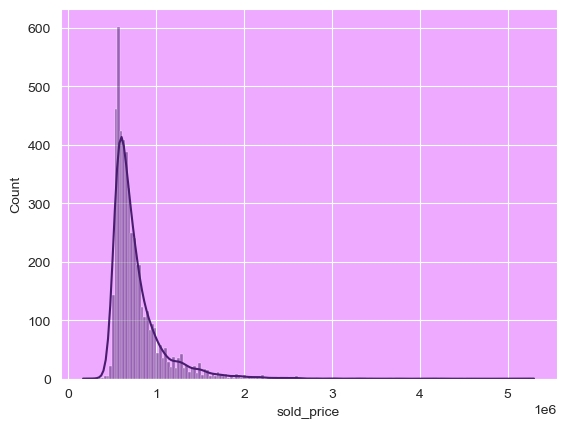

In [64]:
sns.histplot(df.sold_price,kde=True)
plt.show()

#to see the outliers with boxplot for sold_price feature
#If you set kde = True , the histplot() function will add the KDE line

#kernel density estimation (KDE) is the application of kernel smoothing for probability density estimation, i.e., 
#a non-parametric method to estimate the probability density function of a random variable based on kernels as weights.

In [65]:
#df.sold_price.value_counts().nlargest(40).plot(kind="bar",figsize=(10,3))
#plt.show()
#counting sold prices and showing first largest 40 values

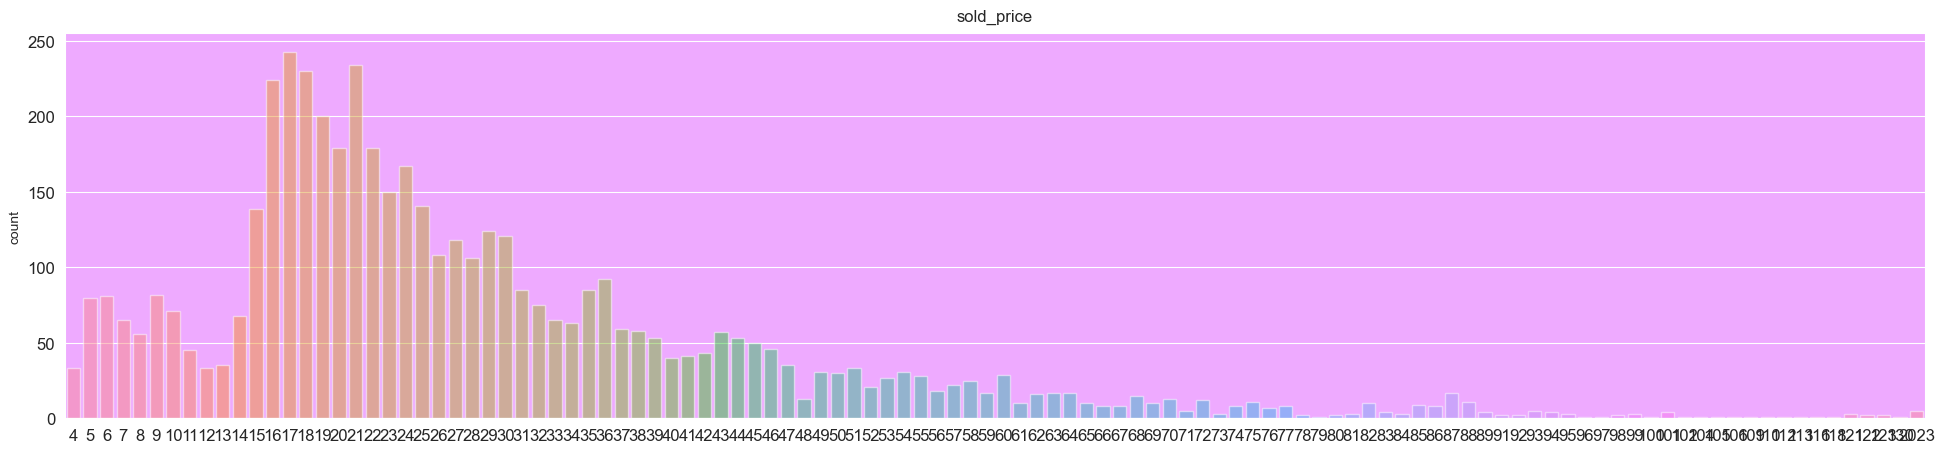

In [66]:
plt.figure(figsize= (24,5))
sns.countplot(x= df["House_Age"], alpha = 0.50, saturation= 1)  
plt.title("sold_price", size= 12, y= 1.01)   
plt.xlabel("")
plt.tick_params(axis = "both", labelsize= 12)
plt.show()

# distribution of house ages depending on sold prices


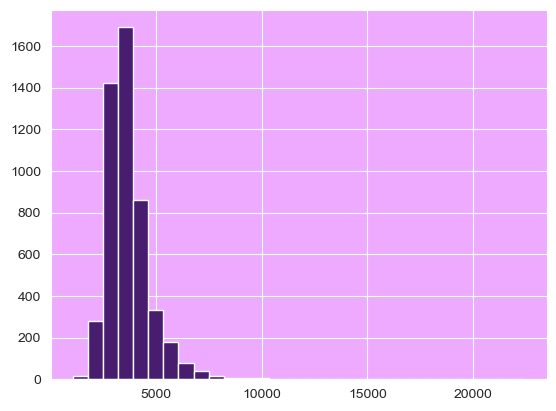

In [67]:
plt.hist(df["sqrt_ft"],bins=30)
plt.show()
#histogram graph for sqrt_ft

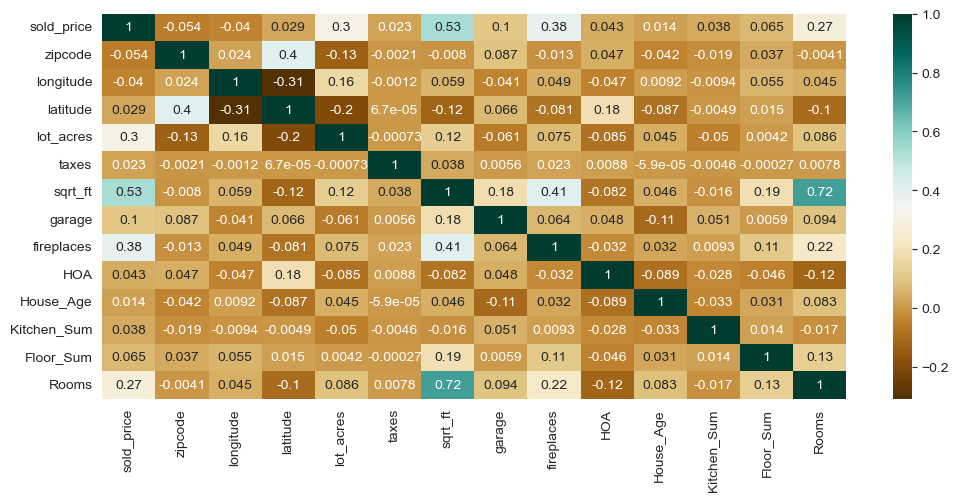

In [68]:
plt.figure(figsize=(12,5));
c=df.corr();
sns.heatmap(c,cmap="BrBG",annot=True)  
plt.show()

#heatmap for correlation values

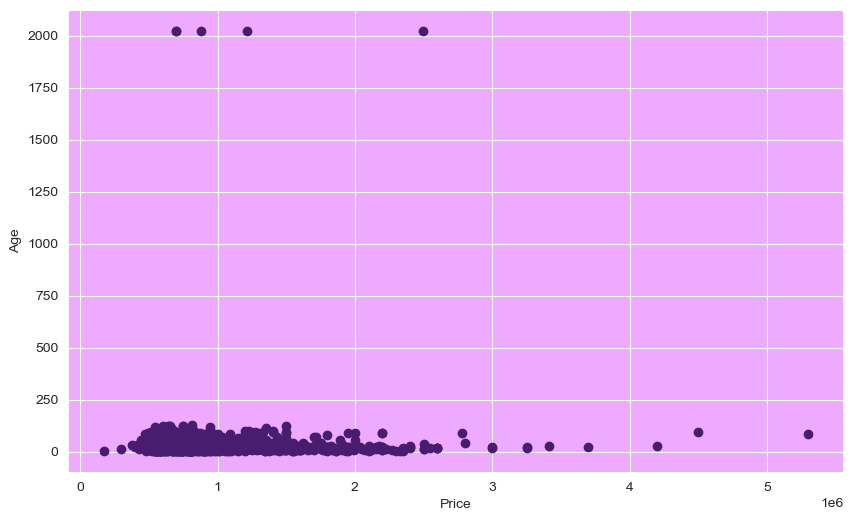

In [69]:
fig,ax=plt.subplots(figsize=(10,6));
ax.scatter(df["sold_price"],df["House_Age"]);
ax.set_ylabel("Age");
ax.set_xlabel("Price")
plt.show()

#scatter graph for sold_price and House_Age features

### Detecting Outliers and Dropping Them        <a class="anchor" id="outlier1"></a>

In [70]:
df.shape   #to see the number of rows and columns

(4940, 14)

In [71]:
Q1 = df.quantile(0.25)    #calculating Q1,Q3 and IQR.
Q3 = df.quantile(0.75) 
IQR = Q3 - Q1
print(IQR)

#The lower quartile, or first quartile (Q1), is the value under which 25% of data points are found 
#when they are arranged in increasing order. The upper quartile, or third quartile (Q3), 
#is the value under which 75% of data points are found when arranged in increasing order. 
#The IQR is the difference between Q3 and Q1.

sold_price    255000.00
zipcode           32.00
longitude          0.12
latitude           0.12
lot_acres          1.22
taxes           3286.40
sqrt_ft         1081.50
garage             1.00
fireplaces         2.00
HOA                1.00
House_Age         19.00
Kitchen_Sum        4.00
Floor_Sum          1.00
Rooms              2.00
dtype: float64


In [72]:
df5= df[~((df < (Q1 - 2.5 * IQR)) |(df > (Q3 + 2.5 * IQR))).any(axis=1)]   
print(df5.shape)
#detecting outliers related to Q1,Q3 AND IQR rule and eliminating them.

(4132, 14)


In [73]:
df5.describe().loc["mean":,]    #calculating new statistical values that we need to check after deleting outliers

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,sqrt_ft,garage,fireplaces,HOA,House_Age,Kitchen_Sum,Floor_Sum,Rooms
mean,725375.60,85729.83,-110.92,32.34,1.26,6475.48,3573.96,2.74,1.80,0.76,27.55,6.47,2.15,7.58
std,189126.04,24.97,0.09,0.08,1.07,2653.81,788.19,0.75,1.03,0.43,14.89,2.96,0.74,1.42
min,375000.00,85641.00,-111.18,32.01,0.02,0.00,1544.00,0.00,0.00,0.00,4.00,1.00,1.00,4.00
25%,585000.00,85718.00,-110.98,32.29,0.57,4851.76,3043.75,2.00,1.00,1.00,18.00,5.00,2.00,7.00
50%,670000.00,85737.00,-110.92,32.32,0.92,6184.14,3470.00,3.00,2.00,1.00,24.00,5.00,2.00,7.00
75%,800000.00,85750.00,-110.86,32.40,1.38,7800.00,4012.25,3.00,2.00,1.00,35.00,8.00,3.00,8.00
max,1475000.00,85755.00,-110.66,32.55,4.86,16225.87,6789.00,5.00,7.00,1.00,83.00,15.00,5.00,14.00


In [74]:
df.describe().loc["mean":,]   #to see the statistical values again before deleting outliers

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,sqrt_ft,garage,fireplaces,HOA,House_Age,Kitchen_Sum,Floor_Sum,Rooms
mean,775748.54,85724.21,-110.91,32.32,4.27,9448.51,3715.98,2.82,1.88,0.72,30.72,6.49,2.17,7.76
std,316051.70,36.71,0.12,0.17,45.85,173984.78,1120.04,1.20,1.13,0.45,65.85,3.01,0.76,2.25
min,169000.00,85118.00,-112.52,31.36,0.02,0.00,1100.00,0.00,0.00,0.00,4.00,1.00,1.00,2.00
25%,585000.00,85718.00,-110.98,32.28,0.59,4819.76,3047.00,2.00,1.00,0.00,17.00,5.00,2.00,7.00
50%,679000.00,85737.00,-110.92,32.32,1.00,6250.80,3512.00,3.00,2.00,1.00,24.00,5.00,2.00,7.00
75%,840000.00,85750.00,-110.86,32.40,1.81,8106.15,4128.50,3.00,3.00,1.00,36.00,9.00,3.00,9.00
max,5300000.00,86323.00,-109.45,34.93,2154.00,12215075.00,22408.00,30.00,9.00,1.00,2023.00,15.00,6.00,71.00


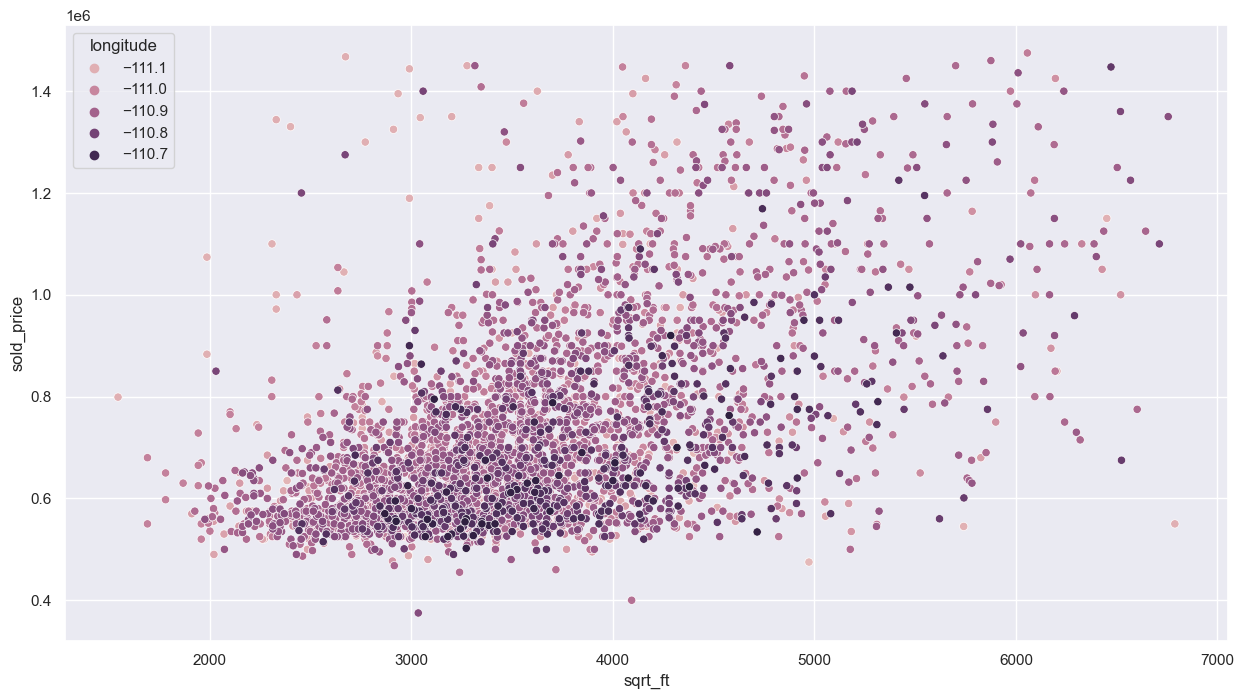

In [75]:

#Scatter plot - state, price, size(sqft)
sns.set(rc = {'figure.figsize':(15, 8)})
sns.scatterplot(x = "sqrt_ft", y = "sold_price", hue="longitude",
                data = df5.groupby(['longitude']).apply(lambda x: x.sort_values(by = ['sold_price'])))

plt.show()

In [76]:
df5.corr()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,sqrt_ft,garage,fireplaces,HOA,House_Age,Kitchen_Sum,Floor_Sum,Rooms
sold_price,1.00,-0.06,-0.04,0.08,0.09,0.54,0.55,0.20,0.34,0.08,-0.18,0.08,0.05,0.33
zipcode,-0.06,1.00,0.29,0.00,0.08,-0.04,0.05,0.11,0.00,-0.00,-0.04,0.01,0.01,0.03
longitude,-0.04,0.29,1.00,-0.52,0.07,-0.07,0.11,-0.03,0.08,-0.02,0.18,0.00,0.07,0.09
latitude,0.08,0.00,-0.52,1.00,-0.21,0.04,-0.13,0.16,-0.11,0.21,-0.35,0.02,-0.05,-0.15
lot_acres,0.09,0.08,0.07,-0.21,1.00,0.15,0.26,0.14,0.15,-0.33,0.03,0.01,0.00,0.21
taxes,0.54,-0.04,-0.07,0.04,0.15,1.00,0.58,0.22,0.39,0.07,-0.06,0.08,0.07,0.36
sqrt_ft,0.55,0.05,0.11,-0.13,0.26,0.58,1.00,0.30,0.37,-0.07,0.04,-0.01,0.18,0.69
garage,0.20,0.11,-0.03,0.16,0.14,0.22,0.30,1.00,0.07,0.11,-0.46,0.03,-0.01,0.23
fireplaces,0.34,0.00,0.08,-0.11,0.15,0.39,0.37,0.07,1.00,-0.01,0.14,0.01,0.07,0.23
HOA,0.08,-0.00,-0.02,0.21,-0.33,0.07,-0.07,0.11,-0.01,1.00,-0.21,-0.05,-0.03,-0.11


In [77]:
#df5.sqrt_ft.value_counts().nlargest(25)

In [78]:
#df5.sort_values('sold_price',ascending=False, inplace = True);    
#df5.reset_index(drop = True, inplace = True)   

#if it is needed, sorting sold prices and index values

In [79]:
df5.head(5) 

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,sqrt_ft,garage,fireplaces,HOA,House_Age,Kitchen_Sum,Floor_Sum,Rooms
85,1400000.00,85750,-110.81,32.28,0.32,7434.00,3058.00,2.00,1.00,0,24,5,2,7.00
137,1350000.00,85750,-110.84,32.33,1.10,14634.00,6756.00,4.00,2.00,1,25,5,3,11.00
147,1450000.00,85658,-111.09,32.47,0.55,1286.59,3276.00,3.00,2.00,1,11,5,2,7.00
167,1450000.00,85755,-110.99,32.47,1.05,4706.41,4360.00,3.00,2.00,1,9,6,3,7.00
173,1400000.00,85718,-110.92,32.33,1.31,8360.00,4438.00,3.00,3.00,1,40,5,2,10.00


In [80]:
df5.describe().loc["mean":,]    

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,sqrt_ft,garage,fireplaces,HOA,House_Age,Kitchen_Sum,Floor_Sum,Rooms
mean,725375.60,85729.83,-110.92,32.34,1.26,6475.48,3573.96,2.74,1.80,0.76,27.55,6.47,2.15,7.58
std,189126.04,24.97,0.09,0.08,1.07,2653.81,788.19,0.75,1.03,0.43,14.89,2.96,0.74,1.42
min,375000.00,85641.00,-111.18,32.01,0.02,0.00,1544.00,0.00,0.00,0.00,4.00,1.00,1.00,4.00
25%,585000.00,85718.00,-110.98,32.29,0.57,4851.76,3043.75,2.00,1.00,1.00,18.00,5.00,2.00,7.00
50%,670000.00,85737.00,-110.92,32.32,0.92,6184.14,3470.00,3.00,2.00,1.00,24.00,5.00,2.00,7.00
75%,800000.00,85750.00,-110.86,32.40,1.38,7800.00,4012.25,3.00,2.00,1.00,35.00,8.00,3.00,8.00
max,1475000.00,85755.00,-110.66,32.55,4.86,16225.87,6789.00,5.00,7.00,1.00,83.00,15.00,5.00,14.00


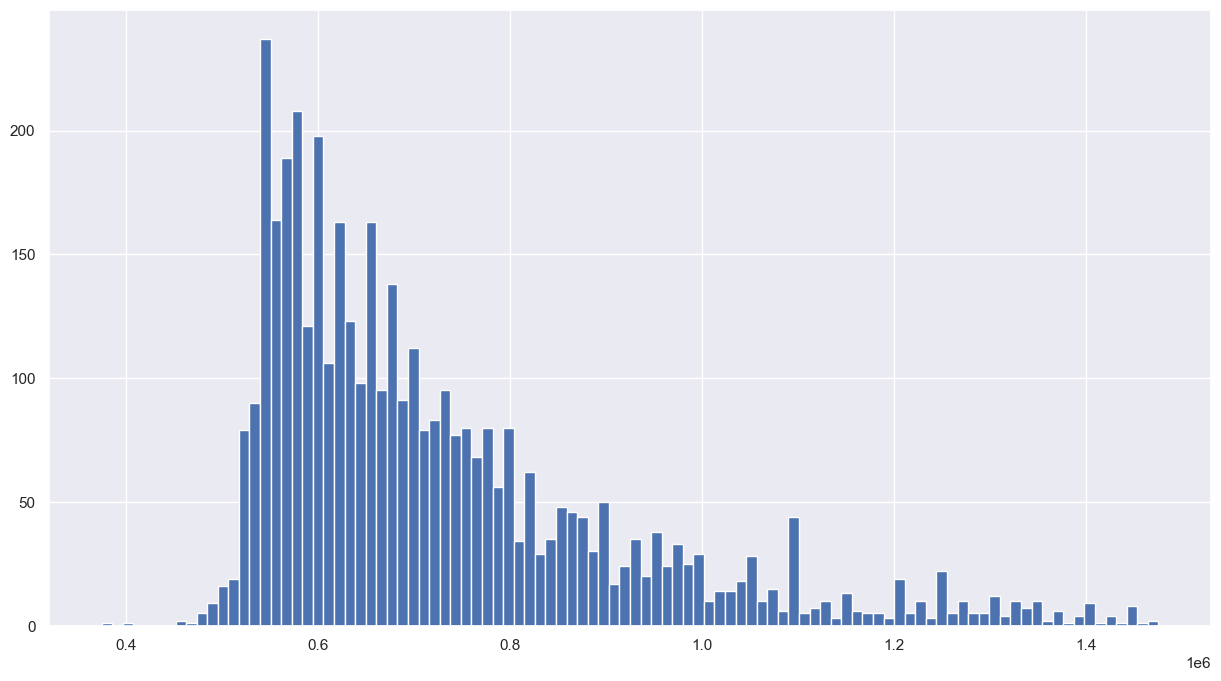

In [81]:
plt.hist(df5["sold_price"],bins=100)
plt.show()
#histogram graph for sqrt_ft

In [82]:
df5["price_category"] = pd.cut(
    x=df5["sold_price"],
    bins=[374000,485000, 595000, 705000,815000,925000,1035000,1145000,1255000,1365000,1475000],
    labels=["1","2","3","4","5","6","7","8","9","10"],
)

#creating price_category column based on sold_price columns

In [83]:
#pps>price per sqft
df5["price_per_sqft"]=df5["sold_price"]/df5["sqrt_ft"]

#creating a new column

In [84]:
df5.tail(5)

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,sqrt_ft,garage,fireplaces,HOA,House_Age,Kitchen_Sum,Floor_Sum,Rooms,price_category,price_per_sqft
4989,545000.00,85745,-111.06,32.31,1.19,6326.96,3720.00,4.00,1.00,1,16,7,1,7.00,2,146.51
4993,565000.00,85750,-110.82,32.31,0.83,4568.71,2813.00,2.00,2.00,1,37,10,2,7.00,2,200.85
4994,535000.00,85718,-110.92,32.32,0.18,4414.00,2106.00,2.00,1.00,1,21,10,1,5.00,2,254.04
4996,550000.00,85750,-110.86,32.32,1.42,4822.01,2318.00,3.00,1.00,1,33,10,2,7.00,2,237.27
4998,550000.00,85745,-111.06,32.30,1.01,5822.93,3724.00,3.00,1.00,0,14,9,2,8.00,2,147.69


In [85]:
min(df5.price_per_sqft)

81.0134040359405

In [86]:
max(df5.price_per_sqft)

577.0717045942465

In [87]:
df5["ppsqft_category"] = pd.cut(
    x=df5["price_per_sqft"],
    bins=[0,130,180, 230, 280,330,380,430,480,530,600],
    labels=["1","2","3","4","5","6","7","8","9","10"],
)

In [88]:
df5["tax_category"] = pd.cut(
    x=df5["taxes"],
    bins=[-1,1622,3245, 4867, 6490,8112,9735,11357,12980,14602,17000],
    labels=["1","2","3","4","5","6","7","8","9","10"],
)

#creating tax_category column based on taxes columns

In [89]:
#df5.tax_category.value_counts(ascending=False)

#if it needed, can be used to sort tax category values

In [90]:
df5.tax_category.isnull().sum()

0

In [91]:
df5["house_age_category"] = pd.cut(
    x=df5["House_Age"],
    bins=[3,12,20, 28, 36,44,52,60,68,76,100],
    labels=["1","2","3","4","5","6","7","8","9","10"],
)

#creating house_age_category column based on house_age columns

In [92]:
#df5["house_age_category"].value_counts(ascending=False)

In [93]:
df5.house_age_category.isnull().sum()

0

In [94]:
#df5.price_category.value_counts(ascending=False)

In [95]:
df5.tail(5)

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,sqrt_ft,garage,fireplaces,HOA,House_Age,Kitchen_Sum,Floor_Sum,Rooms,price_category,price_per_sqft,ppsqft_category,tax_category,house_age_category
4989,545000.00,85745,-111.06,32.31,1.19,6326.96,3720.00,4.00,1.00,1,16,7,1,7.00,2,146.51,2,4,2
4993,565000.00,85750,-110.82,32.31,0.83,4568.71,2813.00,2.00,2.00,1,37,10,2,7.00,2,200.85,3,3,5
4994,535000.00,85718,-110.92,32.32,0.18,4414.00,2106.00,2.00,1.00,1,21,10,1,5.00,2,254.04,4,3,3
4996,550000.00,85750,-110.86,32.32,1.42,4822.01,2318.00,3.00,1.00,1,33,10,2,7.00,2,237.27,4,3,4
4998,550000.00,85745,-111.06,32.30,1.01,5822.93,3724.00,3.00,1.00,0,14,9,2,8.00,2,147.69,2,4,2


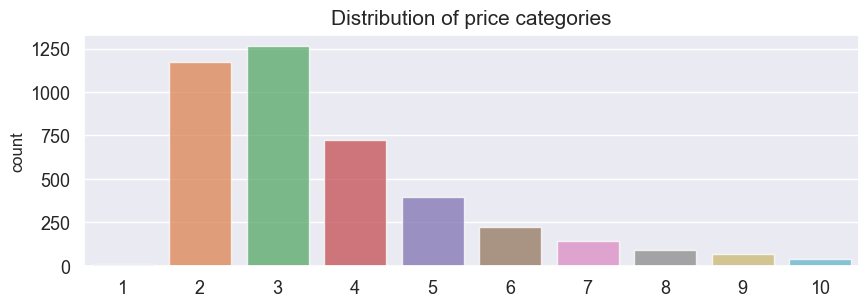

In [96]:
plt.figure(figsize= (10,3))
sns.countplot(x= df5["price_category"], alpha = 0.75, saturation= 1)  
plt.title("Distribution of price categories", size= 15, y= 1.01)    
plt.xlabel("")
plt.tick_params(axis = "both", labelsize= 13)
plt.show()

#Distribution of price categories

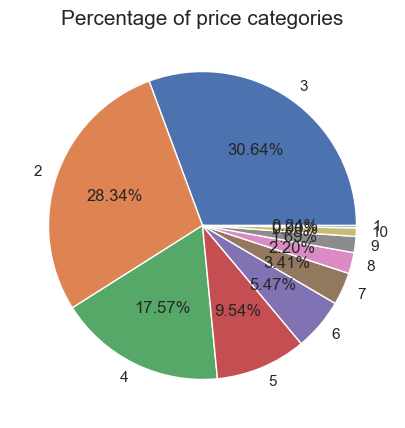

In [97]:
#import seaborn as sns
labels = df5.price_category.value_counts().index
#explode = [0, 0]
sizes = df5.price_category.value_counts().values

plt.figure(figsize= (7, 5))
plt.pie(sizes, labels= labels, autopct = "%1.2f%%")                         #autopct>>percentage
plt.title("Percentage of price categories", fontsize = 15)  #color = "blue"
plt.show();

#Percentage of price categories with "pie" graph

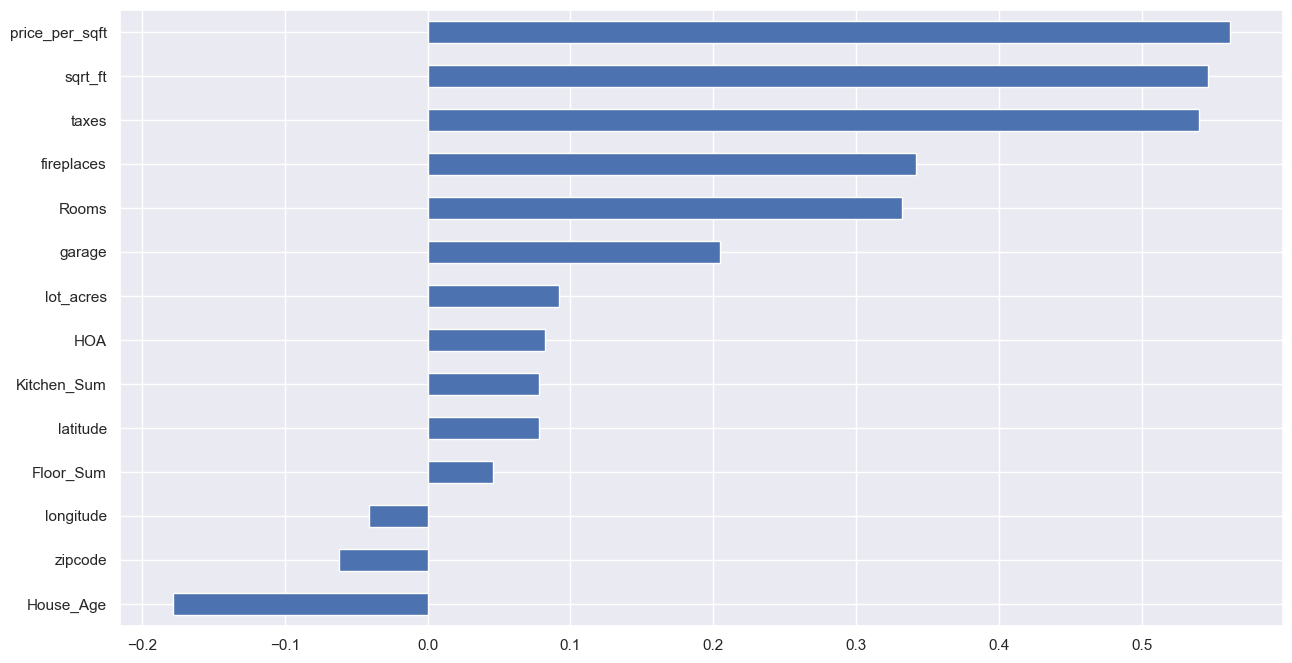

In [98]:
df5.corr()['sold_price'].drop('sold_price').sort_values().plot.barh()
plt.show()

#Correlation with the graph "barh"between sold_price column and other features

In [99]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4132 entries, 85 to 4998
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   sold_price          4132 non-null   float64 
 1   zipcode             4132 non-null   int64   
 2   longitude           4132 non-null   float64 
 3   latitude            4132 non-null   float64 
 4   lot_acres           4132 non-null   float64 
 5   taxes               4132 non-null   float64 
 6   sqrt_ft             4132 non-null   float64 
 7   garage              4132 non-null   float64 
 8   fireplaces          4132 non-null   float64 
 9   HOA                 4132 non-null   int64   
 10  House_Age           4132 non-null   int64   
 11  Kitchen_Sum         4132 non-null   int32   
 12  Floor_Sum           4132 non-null   int32   
 13  Rooms               4132 non-null   float64 
 14  price_category      4132 non-null   category
 15  price_per_sqft      4132 non-null   f

In [100]:
df5["price_category"] =df5["price_category"].astype(int);
df5["tax_category"] =df5["tax_category"].astype(int);
df5["house_age_category"] =df5["house_age_category"].astype(int);

In [101]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4132 entries, 85 to 4998
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   sold_price          4132 non-null   float64 
 1   zipcode             4132 non-null   int64   
 2   longitude           4132 non-null   float64 
 3   latitude            4132 non-null   float64 
 4   lot_acres           4132 non-null   float64 
 5   taxes               4132 non-null   float64 
 6   sqrt_ft             4132 non-null   float64 
 7   garage              4132 non-null   float64 
 8   fireplaces          4132 non-null   float64 
 9   HOA                 4132 non-null   int64   
 10  House_Age           4132 non-null   int64   
 11  Kitchen_Sum         4132 non-null   int32   
 12  Floor_Sum           4132 non-null   int32   
 13  Rooms               4132 non-null   float64 
 14  price_category      4132 non-null   int32   
 15  price_per_sqft      4132 non-null   f

In [102]:
df5.head(2)

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,sqrt_ft,garage,fireplaces,HOA,House_Age,Kitchen_Sum,Floor_Sum,Rooms,price_category,price_per_sqft,ppsqft_category,tax_category,house_age_category
85,1400000.00,85750,-110.81,32.28,0.32,7434.00,3058.00,2.00,1.00,0,24,5,2,7.00,10,457.82,8,5,3
137,1350000.00,85750,-110.84,32.33,1.10,14634.00,6756.00,4.00,2.00,1,25,5,3,11.00,9,199.82,3,10,3


In [103]:
df5["ppsqft_category"] =df5["ppsqft_category"].astype(int);

In [104]:
# df_NW=df5[["ppsqft_category","sold_price","price_category","price_per_sqft","House_Age","Kitchen_Sum","Floor_Sum","Rooms","tax_category","house_age_category"]].copy();   #"zipcode"
# df_NW

In [105]:
df_neww=df5[["ppsqft_category","longitude","latitude"]].copy();   
df_neww

,ppsqft_category,longitude,latitude
85,8,-110.81,32.28
137,3,-110.84,32.33
147,8,-111.09,32.47
167,6,-110.99,32.47
173,5,-110.92,32.33
...,...,...,...
4989,2,-111.06,32.31
4993,3,-110.82,32.31
4994,4,-110.92,32.32
4996,4,-110.86,32.32


In [106]:
# test=df_new[2620:];
# train= df_new[:2620];
# df_new[2620:]


# y_test=test[:,0];
# X_test=test[:,1:];
# X_test.shape

#if we want to split as train and test, this can be used (80/20)

In [107]:
df_neww.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4132 entries, 85 to 4998
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ppsqft_category  4132 non-null   int32  
 1   longitude        4132 non-null   float64
 2   latitude         4132 non-null   float64
dtypes: float64(2), int32(1)
memory usage: 113.0 KB


In [108]:
#dfC=df_new[["longitude","latitude"]].copy();
#normalized=(dfC-dfC.mean())/dfC.std(); 
X=df_neww.to_numpy();
#test=test.to_numpy();
#y=df_new[:,0];

In [109]:
X

array([[   8.      , -110.807964,   32.282133],
       [   3.      , -110.839258,   32.325702],
       [   8.      , -111.093659,   32.472548],
       ...,
       [   4.      , -110.922291,   32.317496],
       [   4.      , -110.858556,   32.316373],
       [   2.      , -111.055528,   32.296871]])

In [110]:
y=X[:,0]

In [111]:
y

array([8., 3., 8., ..., 4., 4., 2.])

In [112]:
X=X[:,1:]

In [113]:
X

array([[-110.807964,   32.282133],
       [-110.839258,   32.325702],
       [-111.093659,   32.472548],
       ...,
       [-110.922291,   32.317496],
       [-110.858556,   32.316373],
       [-111.055528,   32.296871]])

In [114]:
X.shape

(4132, 2)

In [115]:
y.shape

(4132,)

In [116]:
def accuracy(y,y_hat):
    return np.mean(y==y_hat)

In [117]:
class KNNClassifier():
    def fit(self,X,y):
        self.X=X
        self.y=y.astype(int)
    
    def predict(self,X,K,epsilon=1e-10):         
        N=len(X)
        y_hat=np.zeros(N)
        
        for i in range(N):
            dist2=np.sum((self.X-X[i])**2,axis=1)          #self.X>>> MATRIX  ARRAY OF ROWS??
            idxt=np.argsort(dist2)[:K]                     #  will give indices  numpy array
            gamma_k=1/(np.sqrt(dist2[idxt]+epsilon))       #list of inverse of distances
            y_hat[i]=np.bincount(self.y[idxt], weights=gamma_k).argmax()
         
        return y_hat  

In [118]:
knn=KNNClassifier();
knn.fit(X,y);
y_hat=knn.predict(X,3);

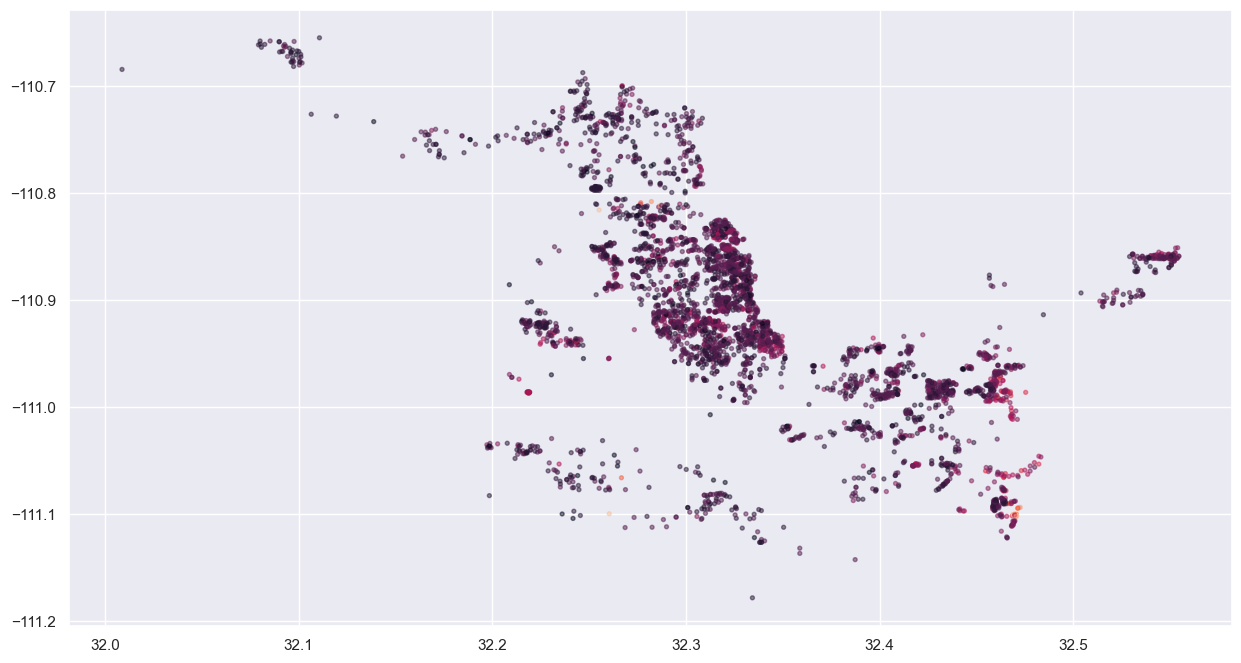

In [120]:
plt.figure()
plt.scatter(X[:,1],X[:,0],c=y_hat, alpha=0.5, s=8)

In [121]:
round(accuracy(y,y_hat),3) 

0.99

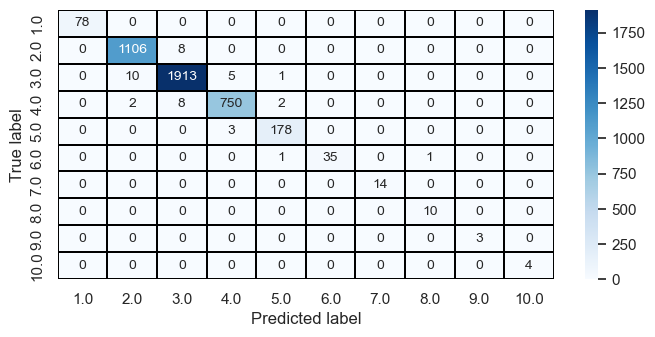

In [122]:
import seaborn as sns
plt.figure(figsize=(8,3.5))
y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(y_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.02, linecolor='black', annot_kws = {"size": 10})
plt.ylabel('True label')
plt.xlabel('Predicted label');

REGRESSION

In [123]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4132 entries, 85 to 4998
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sold_price          4132 non-null   float64
 1   zipcode             4132 non-null   int64  
 2   longitude           4132 non-null   float64
 3   latitude            4132 non-null   float64
 4   lot_acres           4132 non-null   float64
 5   taxes               4132 non-null   float64
 6   sqrt_ft             4132 non-null   float64
 7   garage              4132 non-null   float64
 8   fireplaces          4132 non-null   float64
 9   HOA                 4132 non-null   int64  
 10  House_Age           4132 non-null   int64  
 11  Kitchen_Sum         4132 non-null   int32  
 12  Floor_Sum           4132 non-null   int32  
 13  Rooms               4132 non-null   float64
 14  price_category      4132 non-null   int32  
 15  price_per_sqft      4132 non-null   float64
 16  ppsqf

In [124]:
corr = df5.corr().sold_price
corr[np.argsort(corr, axis= 0)[:-1]]  

House_Age            -0.18
house_age_category   -0.17
zipcode              -0.06
longitude            -0.04
Floor_Sum             0.05
latitude              0.08
Kitchen_Sum           0.08
HOA                   0.08
lot_acres             0.09
garage                0.20
Rooms                 0.33
fireplaces            0.34
ppsqft_category       0.53
tax_category          0.53
taxes                 0.54
sqrt_ft               0.55
price_per_sqft        0.56
price_category        0.99
Name: sold_price, dtype: float64

In [127]:
dfR=df5[["sold_price","sqrt_ft","ppsqft_category","Rooms","House_Age","fireplaces","garage","latitude","longitude","lot_acres"]].copy();
dfR 

,sold_price,sqrt_ft,ppsqft_category,Rooms,House_Age,fireplaces,garage,latitude,longitude,lot_acres
85,1400000.00,3058.00,8,7.00,24,1.00,2.00,32.28,-110.81,0.32
137,1350000.00,6756.00,3,11.00,25,2.00,4.00,32.33,-110.84,1.10
147,1450000.00,3276.00,8,7.00,11,2.00,3.00,32.47,-111.09,0.55
167,1450000.00,4360.00,6,7.00,9,2.00,3.00,32.47,-110.99,1.05
173,1400000.00,4438.00,5,10.00,40,3.00,3.00,32.33,-110.92,1.31
...,...,...,...,...,...,...,...,...,...,...
4989,545000.00,3720.00,2,7.00,16,1.00,4.00,32.31,-111.06,1.19
4993,565000.00,2813.00,3,7.00,37,2.00,2.00,32.31,-110.82,0.83
4994,535000.00,2106.00,4,5.00,21,1.00,2.00,32.32,-110.92,0.18
4996,550000.00,2318.00,4,7.00,33,1.00,3.00,32.32,-110.86,1.42


KNN Regression

In [128]:
X=dfR.to_numpy();

In [129]:
y=X[:,0]

In [130]:
y

array([1400000., 1350000., 1450000., ...,  535000.,  550000.,  550000.])

In [131]:
X=X[:,1:]

In [132]:
X

array([[ 3.05800000e+03,  8.00000000e+00,  7.00000000e+00, ...,
         3.22821330e+01, -1.10807964e+02,  3.20000000e-01],
       [ 6.75600000e+03,  3.00000000e+00,  1.10000000e+01, ...,
         3.23257020e+01, -1.10839258e+02,  1.10000000e+00],
       [ 3.27600000e+03,  8.00000000e+00,  7.00000000e+00, ...,
         3.24725480e+01, -1.11093659e+02,  5.50000000e-01],
       ...,
       [ 2.10600000e+03,  4.00000000e+00,  5.00000000e+00, ...,
         3.23174960e+01, -1.10922291e+02,  1.80000000e-01],
       [ 2.31800000e+03,  4.00000000e+00,  7.00000000e+00, ...,
         3.23163730e+01, -1.10858556e+02,  1.42000000e+00],
       [ 3.72400000e+03,  2.00000000e+00,  8.00000000e+00, ...,
         3.22968710e+01, -1.11055528e+02,  1.01000000e+00]])

In [133]:
X.shape

(4132, 9)

In [134]:
y.shape

(4132,)

In [135]:
class KNNRegressor():
    def fit(self,X,y):
        self.X=X
        self.y=y
    def predict(self,X,K,epsilon=1e-3):
        N=len(X)
        y_hat=np.zeros(N)
        
        for i in range(N):
            dist2=np.sum((self.X-X[i])**2,axis=1)
            idxt=np.argsort(dist2)[:K]
            gamma_k=np.exp(-dist2[idxt])/np.exp(-dist2[idxt]).sum()
            y_hat[i]=gamma_k.dot(self.y[idxt])
        return y_hat

In [136]:
def R2(y,y_hat):
    return (1-(np.sum((y-y_hat)**2)/np.sum((y-np.mean(y))**2)))  

In [137]:
knnr=KNNRegressor()

In [138]:
knnr.fit(X,y)

In [139]:
y_hat=knnr.predict(X,2);

In [140]:
y_hat

array([1400000.        , 1350000.        , 1450000.        , ...,
        535000.        ,  550000.        ,  550000.00003782])

In [141]:
round(R2(y,y_hat),3)

0.997

In [142]:
my_dict={"Actual":y,"Pred":y_hat,"Residual":y-y_hat}

In [143]:
my_dict

{'Actual': array([1400000., 1350000., 1450000., ...,  535000.,  550000.,  550000.]),
 'Pred': array([1400000.        , 1350000.        , 1450000.        , ...,
         535000.        ,  550000.        ,  550000.00003782]),
 'Residual': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -3.78161203e-05])}

In [144]:
comparing=pd.DataFrame(my_dict); 
comparing.sort_values(by="Residual")

,Actual,Pred,Residual
1812,690000.00,777500.00,-87500.00
1968,699000.00,779500.00,-80500.00
3309,455000.00,528958.89,-73958.89
204,1150000.00,1216996.65,-66996.65
3903,400000.00,463201.23,-63201.23
...,...,...,...
2239,635000.00,571798.77,63201.23
121,1284000.00,1217003.35,66996.65
1549,730000.00,656041.11,73958.89
726,860000.00,779500.00,80500.00


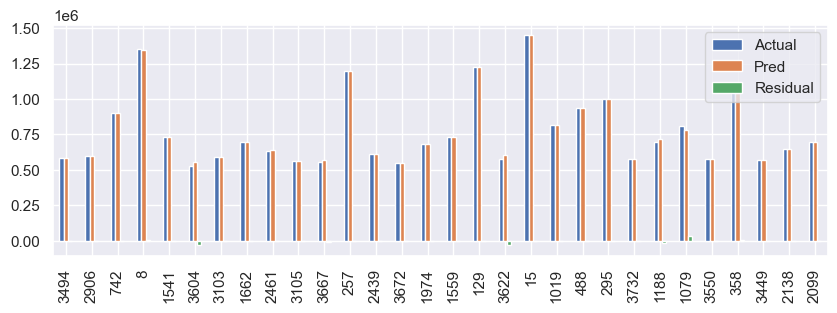

In [160]:
result_sample=comparing.sample(30)
result_sample.plot(kind="bar",figsize=(10,3))
plt.show()

In [146]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [147]:
from geopy import Nominatim

In [148]:
geolocator=Nominatim(user_agent="mAIstros")

In [149]:
location=geolocator.geocode("1785 The Exchange SE, Atlanta")

In [152]:
location

Location(1785, The Exchange Southeast, Atlanta, Cobb County, Georgia, 30339, United States, (33.90915665, -84.47914869915438, 0.0))

In [153]:
location.point

Point(33.90915665, -84.47914869915438, 0.0)

In [154]:
location2=geolocator.geocode("w2 3nl")

In [155]:
location2

Location(City of Westminster, Greater London, England, W2 3NL, United Kingdom, (51.5113, -0.18093, 0.0))

In [ ]:
a,b,c=location.point

In [ ]:
print(a,b,c)

DEMO

In [156]:
XTest=np.array([[3050,4,5,20,2,3,33.9,-110.8,0.35]])

In [157]:
y_hat=knnr.predict(XTest,2);


In [158]:
y_hat

array([680260.52465209])

In [ ]:
# sqrt_ft>>3050
# ppsqft_category>4
# Rooms>5
# House_Age>20
# fireplaces>2
# garage>3
# latitude>33.9
# longitude>-110.8
# lot_acres>0.35
#>>>>>prediction with these values:$680260